In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.metrics import mean_squared_error, r2_score
import os, fnmatch
from sklearn.cluster import KMeans
from sklearn.preprocessing import PolynomialFeatures 
import seaborn as sns
from sklearn.decomposition import PCA #Principal Component Analysis
from sklearn.manifold import TSNE #T-Distributed Stochastic Neighbor Embedding
from sklearn.preprocessing import StandardScaler #used for 'Feature Scaling'
# import plotly as py
# import plotly.graph_objs as go
# from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

%matplotlib inline

In [2]:
df = pd.read_csv("astro_objects.csv")

In [3]:
df.head()

,Unnamed: 0,Unnamed: 0.1,plate,object_id,ra,dec,mag_B,mag_R,spectrum_class,spectrum_length,...,9,10,11,12,13,14,15,16,fits_path,jpeg_path
0,0,0,fbs0005,DFBSJ142114.64+425823.6,14:21:14.640,+42:58:23.63,13.86,13.15,OK,101,...,-2.189981e-11,-3.665937e-14,-9.373043e-12,-1.532294e-09,1.024176e-11,-2.280213e-14,2.109259e-17,-6.999758e-21,specimages/fbs0005-DFBSJ142114.64+425823.6.fits,specimagesjpeg/fbs0005-DFBSJ142114.64+425823.6...
1,1,1,fbs0005,DFBSJ142122.01+425921.3,14:21:22.012,+42:59:21.37,12.85,12.20,OK,106,...,-3.792762e-11,-3.647929e-14,-1.208479e-11,-1.865856e-09,1.801383e-11,-4.706942e-14,4.814870e-17,-1.724178e-20,specimages/fbs0005-DFBSJ142122.01+425921.3.fits,specimagesjpeg/fbs0005-DFBSJ142122.01+425921.3...
2,2,2,fbs0005,DFBSJ142125.68+425138.2,14:21:25.688,+42:51:38.29,16.38,14.85,NL,83,...,-1.815388e-11,-1.309881e-14,-3.936086e-12,-6.570811e-10,3.287456e-12,-6.007407e-15,4.796814e-18,-1.419620e-21,specimages/fbs0005-DFBSJ142125.68+425138.2.fits,specimagesjpeg/fbs0005-DFBSJ142125.68+425138.2...
3,3,3,fbs0005,DFBSJ142126.80+425301.4,14:21:26.802,+42:53:01.40,14.45,13.57,NL,120,...,-4.077909e-11,-2.942382e-14,-8.841611e-12,-1.475995e-09,8.681218e-12,-1.793400e-14,1.573814e-17,-5.009265e-21,specimages/fbs0005-DFBSJ142126.80+425301.4.fits,specimagesjpeg/fbs0005-DFBSJ142126.80+425301.4...
4,4,4,fbs0005,DFBSJ142141.43+430014.5,14:21:41.436,+43:00:14.59,16.39,16.47,NL,90,...,-1.024508e-12,-1.714980e-15,-4.384846e-13,-7.168274e-11,5.490072e-13,-1.330955e-15,1.317058e-18,-4.632790e-22,specimages/fbs0005-DFBSJ142141.43+430014.5.fits,specimagesjpeg/fbs0005-DFBSJ142141.43+430014.5...


In [4]:
X = df[["9", "10", "11", "12", "13", "14", "15", "16"]]

In [5]:
X.head()

,9,10,11,12,13,14,15,16
0,-2.189981e-11,-3.665937e-14,-9.373043e-12,-1.532294e-09,1.024176e-11,-2.280213e-14,2.109259e-17,-6.999758e-21
1,-3.792762e-11,-3.647929e-14,-1.208479e-11,-1.865856e-09,1.801383e-11,-4.706942e-14,4.814870e-17,-1.724178e-20
2,-1.815388e-11,-1.309881e-14,-3.936086e-12,-6.570811e-10,3.287456e-12,-6.007407e-15,4.796814e-18,-1.419620e-21
3,-4.077909e-11,-2.942382e-14,-8.841611e-12,-1.475995e-09,8.681218e-12,-1.793400e-14,1.573814e-17,-5.009265e-21
4,-1.024508e-12,-1.714980e-15,-4.384846e-13,-7.168274e-11,5.490072e-13,-1.330955e-15,1.317058e-18,-4.632790e-22


In [6]:
Sum_of_squared_distances = []
K = range(1,6)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(X)
    Sum_of_squared_distances.append(km.inertia_)

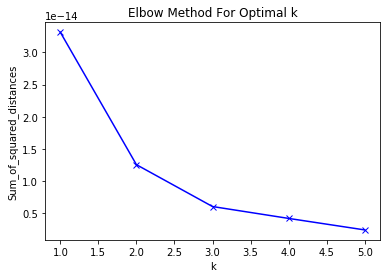

In [7]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [8]:
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

In [9]:
kmeans.labels_

array([0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [18]:
class_1 = []
class_2 = []
class_3 = []
for i in range(len(kmeans.labels_)):
    if kmeans.labels_[i] == 0:
        class_1.append(True)
    else:
        class_1.append(False)
    
    if kmeans.labels_[i] == 1:
        class_2.append(True)
    else:
        class_2.append(False)
        
    if kmeans.labels_[i] == 2:
        class_3.append(True)
    else:
        class_3.append(False)
        

In [20]:
class_1 = np.array(class_1)
class_2 = np.array(class_2)
class_3 = np.array(class_3)

In [31]:
class_1.shape[0]

770

In [25]:
class_1_series = pd.Series(class_1, name = 'class_1')
class_2_series = pd.Series(class_2, name = 'class_2')
class_3_series = pd.Series(class_3, name = 'class_3')

In [29]:
class_1_id_df = df[['object_id', "jpeg_path"]][class_1_series.values]
class_2_id_df = df[['object_id', "jpeg_path"]][class_2_series.values]
class_3_id_df = df[['object_id', "jpeg_path"]][class_3_series.values]


,object_id,jpeg_path
0,DFBSJ142114.64+425823.6,specimagesjpeg/fbs0005-DFBSJ142114.64+425823.6...
1,DFBSJ142122.01+425921.3,specimagesjpeg/fbs0005-DFBSJ142122.01+425921.3...
2,DFBSJ142125.68+425138.2,specimagesjpeg/fbs0005-DFBSJ142125.68+425138.2...
3,DFBSJ142126.80+425301.4,specimagesjpeg/fbs0005-DFBSJ142126.80+425301.4...
4,DFBSJ142141.43+430014.5,specimagesjpeg/fbs0005-DFBSJ142141.43+430014.5...


In [36]:
arr_value_1 = np.full(class_1_id_df.shape[0], 1)
arr_value_2 = np.full(class_2_id_df.shape[0], 2)
arr_value_3 = np.full(class_3_id_df.shape[0], 3)

In [42]:
class_1_id_df["value"] = arr_value_1

In [44]:
class_2_id_df["value"] = arr_value_2
class_3_id_df["value"] = arr_value_3

In [47]:
frames = [class_1_id_df, class_2_id_df, class_3_id_df]
result = pd.concat(frames)

In [48]:
result

,object_id,jpeg_path,value
0,DFBSJ142114.64+425823.6,specimagesjpeg/fbs0005-DFBSJ142114.64+425823.6...,1
1,DFBSJ142122.01+425921.3,specimagesjpeg/fbs0005-DFBSJ142122.01+425921.3...,1
2,DFBSJ142125.68+425138.2,specimagesjpeg/fbs0005-DFBSJ142125.68+425138.2...,1
3,DFBSJ142126.80+425301.4,specimagesjpeg/fbs0005-DFBSJ142126.80+425301.4...,1
4,DFBSJ142141.43+430014.5,specimagesjpeg/fbs0005-DFBSJ142141.43+430014.5...,1
...,...,...,...
440,DFBSJ231335.81+151905.4,specimagesjpeg/fbs0122-DFBSJ231335.81+151905.4...,3
608,DFBSJ083330.60+225228.4,specimagesjpeg/fbs0129-DFBSJ083330.60+225228.4...,3
710,DFBSJ071746.00+470631.8,specimagesjpeg/fbs0785M-DFBSJ071746.00+470631....,3
743,DFBSJ041619.14-005522.1,specimagesjpeg/fbs1309-DFBSJ041619.14-005522.1...,3


In [50]:
result.to_csv("result_test_ann_dataset.csv");